# Plotting

Learn the basics of plotting with `pandas` from *preliminary* visual exploration of data.

## Dataset 1: Glacial data

Let's start by importing the data:


In [1]:
import pandas as pd

#read in file
df = pd.read_csv('glacial_loss.csv')

#see the first 5 rows
df.head()

,year,europe,arctic,alaska,asia,north_america,south_america,antarctica,global_glacial_volume_change,annual_sea_level_rise,cumulative_sea_level_rise
0,1961,-5.128903,-108.382987,-18.721190,-32.350759,-14.359007,-4.739367,-35.116389,-220.823515,0.610010,0.610010
1,1962,5.576282,-173.252450,-24.324790,-4.675440,-2.161842,-13.694367,-78.222887,-514.269862,0.810625,1.420635
2,1963,-10.123105,-0.423751,-2.047567,-3.027298,-27.535881,3.419633,3.765109,-550.575640,0.100292,1.520927
3,1964,-4.508358,20.070148,0.477800,-18.675385,-2.248286,20.732633,14.853096,-519.589859,-0.085596,1.435331
4,1965,10.629385,43.695389,-0.115332,-18.414602,-19.398765,6.862102,22.793484,-473.112003,-0.128392,1.306939


In [2]:
# print columns
print(df.columns)

Index(['year', 'europe', 'arctic', 'alaska', 'asia', 'north_america',
       'south_america', 'antarctica', 'global_glacial_volume_change',
       'annual_sea_level_rise', 'cumulative_sea_level_rise'],
      dtype='object')


# `plot()` method

`pandas.DataFrame` has a built-in method `plot()` for plotting.
Default behavior of plot without specifying parameters:

- createss one line plot for each of the columns with numeric data.
- sets the values of the index as the x-axis values

Example:

<AxesSubplot:>

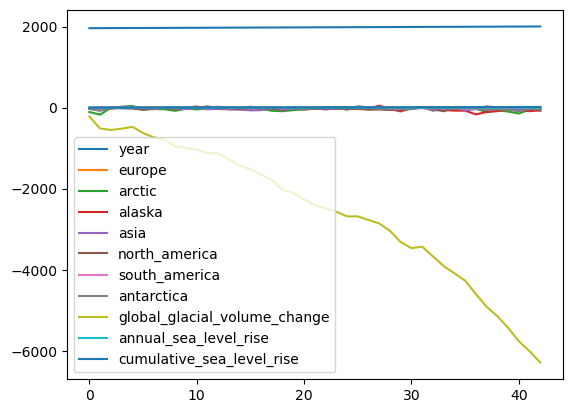

In [3]:
# a mess
df.plot()

## Line Plots

We can make a line plot of one column against another by using the following syntax:

```
df.plot(x = 'x-values-columns', y = 'y-values-columns')
```

Example:

<AxesSubplot:xlabel='year'>

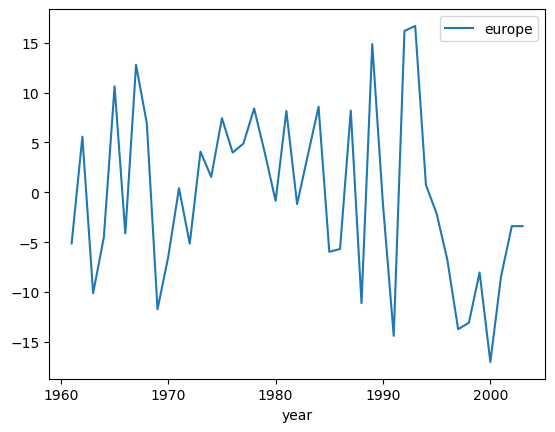

In [4]:
# change in glacial volume per year in Europe 
df.plot(x='year', y = 'europe')

Basic customization specifying other arguments in `plot()`

Example:


<AxesSubplot:title={'center':'Change in glacial volume per year in Europe'}, xlabel='Year', ylabel='Change im glacial volume (km3)'>

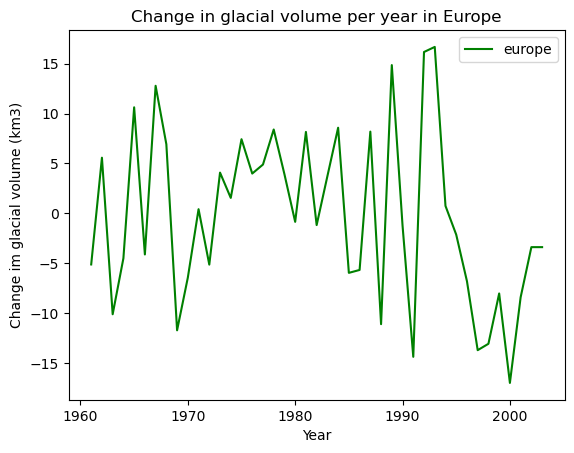

In [5]:
# change in glacial volume per year in Europe 
df.plot(x='year',
        y = 'europe',
       title = 'Change in glacial volume per year in Europe',
       xlabel='Year',
       ylabel = 'Change im glacial volume (km3)',
       color = 'green')

# Multiple Line Plots 

We want to graph the change in glacial volume in the Arctic and Alasks. Update these arguments:

- 'y': a list of column names
- 'color': specify the color of each column with a dictionary 
```
{'col1':'color1', ...}
```

Example:


<AxesSubplot:xlabel='year'>

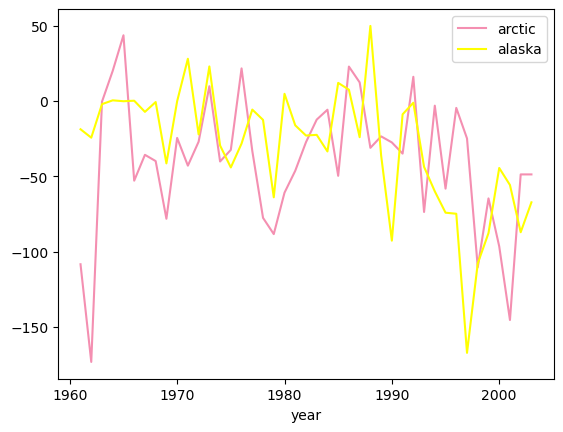

In [7]:
colors = {'arctic': '#F48FB1',
         'alaska': 'yellow'}

df.plot(x = 'year',
       y = ['arctic', 'alaska'],
       color = colors)

Create separate plots setting the `subset` argument to `True`

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

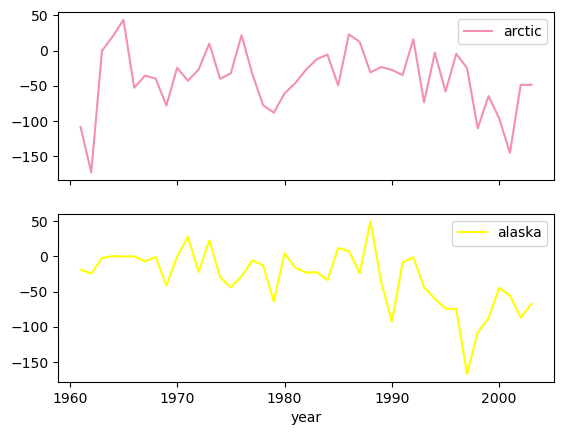

In [12]:
colors = {'arctic': '#F48FB1',
         'alaska': 'yellow'}

df.plot(x = 'year',
       y = ['arctic', 'alaska'],
       color = colors,
        subplots = True)

## Check-in

1. plot a graph of the annual sea level rise with respect to years
2. in the following code, what information is stored in `columns` variable? Describe what we are plotting

<AxesSubplot:title={'center':'Annual sea level rise'}, xlabel='Year', ylabel='Annual sea level rise'>

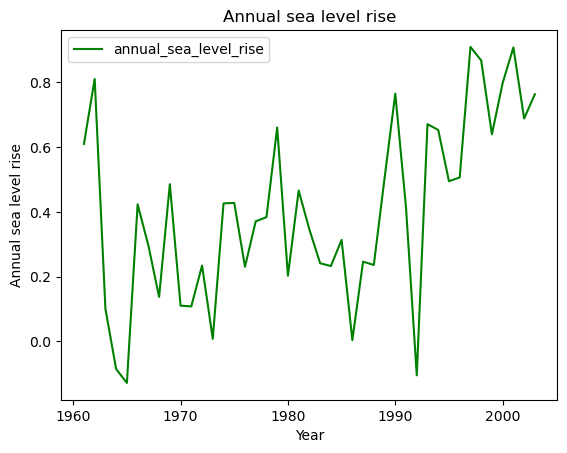

In [14]:
# 1. change in sea level rise per year in Europe 
df.plot(x='year',
        y = 'annual_sea_level_rise',
       title = 'Annual sea level rise',
       xlabel='Year',
       ylabel = 'Annual sea level rise',
       color = 'green')

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

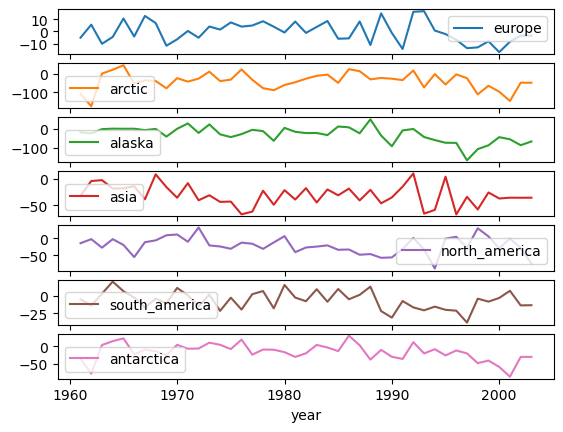

In [13]:
#2. all rows for columns europe to antactica and then just call the column names instead of the whole column

columns = df.loc[:,'europe':'antarctica'].columns

df.plot(x = 'year',
       y = columns,
       subplots = True)

## Dataset 2: Palmer Penguins dataset 

We will read the data set from the following url:
bit.ly/palmer-penguins-csv

In [15]:
# read in data
penguins = pd.read_csv('https://bit.ly/palmer-penguins-csv')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [16]:
#check the column data types and the # of non NA values in each column
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [17]:
# simple statistics about numeric columns 
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [19]:
# for categorical data and year
#count unique values
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [20]:
# get unique values for specific columns 
#unique values in species columns
print(penguins.species.unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [21]:
# species unique value counts
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

# `kind()` argument in `plot()`
`plot()` default = creating a line plot

parameter that controls what kind of plot we get is `kind()`

## Scatter plots 

Example: visually compare the flippper length against body mass

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

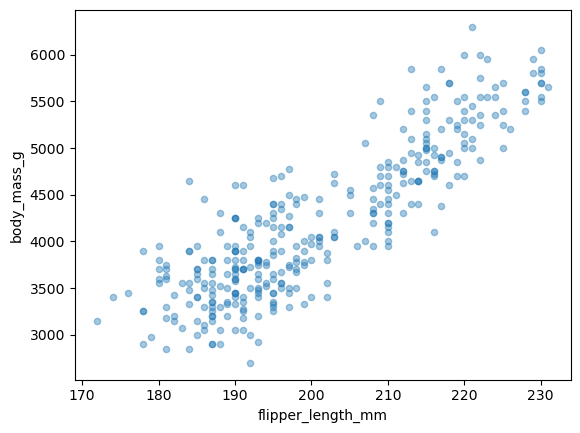

In [23]:
penguins.plot(kind= 'scatter',
             x = 'flipper_length_mm',
             y = 'body_mass_g',
             alpha = 0.4) # controls transparency of points 

## Bar plots 

set `kind='bar'` in the `plot()` method

Example: we want the 10 penguins with the lowest body mass

1. find the penguins with smallest body mass using `nsmallest()` method for series

In [26]:
smallest = penguins.body_mass_g.nsmallest()
smallest

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
Name: body_mass_g, dtype: float64

In [30]:
# sort_values orders values in ascending order by default
smallest = penguins.body_mass_g.nsmallest(10).sort_values(ascending=False)
smallest

44     3000.0
47     2975.0
104    2925.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
58     2850.0
64     2850.0
314    2700.0
Name: body_mass_g, dtype: float64

<AxesSubplot:>

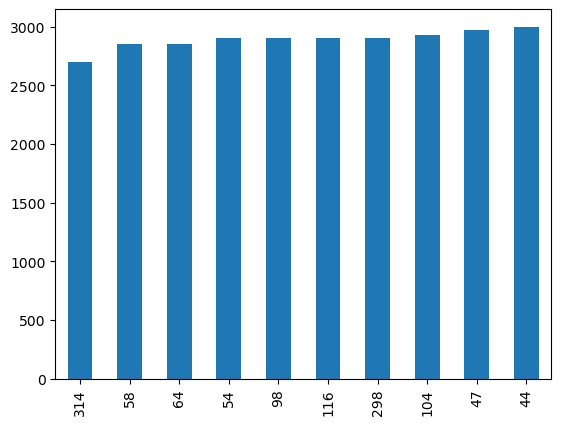

In [28]:
# plot smallest body masses as bars
smallest.plot(kind='bar')

## Reminder 
- this provides the output of the function, `type` = panda.Series
```
penguins.body_mass_g.nsmallest(10).sort_values()
```

- this provides the function but lacks the output, `type` = method 
```
penguins.body_mass_g.nsmallest(10).sort_values
```

What if we wanted to look at other data for the 10 smallest penguins?

We can use the `index` of the `smallest` series to select those rows in the original `penguins` data frame (use `loc`)

In [29]:
penguins.loc[smallest.index]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
44,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007


# Histogram

To create a histogram, set `kind='hist'` in `plot()`.

<AxesSubplot:ylabel='Frequency'>

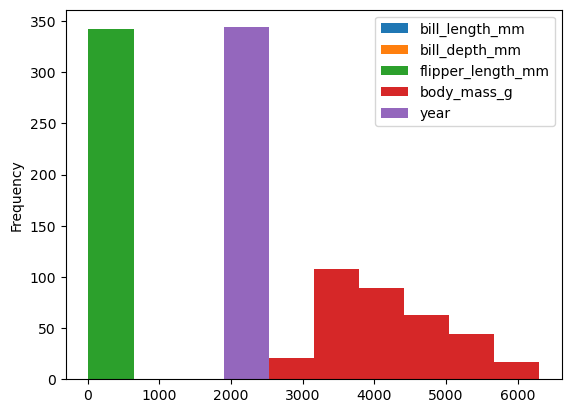

In [31]:
# using plot() without subsetting data = a mess again
penguins.plot(kind='hist')

<AxesSubplot:title={'center':'Penguin Flipper length in mm distribution'}, ylabel='Frequency'>

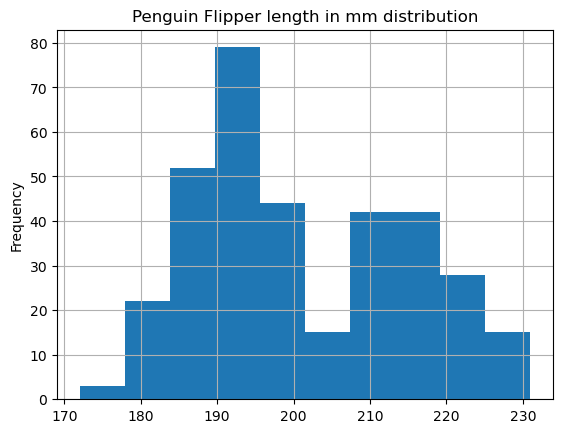

In [36]:
# distribution of flipper length measurements
# first select data, then plot
penguins.flipper_length_mm.plot(kind='hist',
                               title='Penguin Flipper length in mm distribution',
                               xlabel='flipper length in mm',
                               grid=True)

## Check-in
1. Select the `bill-length_mm` and `bill_depth_mm` columns in the penguins data frame and then update the kind parameter to box to make boxplots for the bill length and bill depth

2. select both rows and columns to create a histogram for the flipper length of gentoo penguins 

bill_length_mm       AxesSubplot(0.125,0.11;0.352273x0.77)
bill_depth_mm     AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

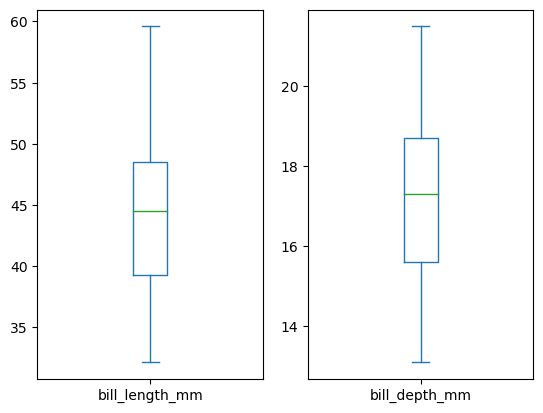

In [42]:
penguins[['bill_length_mm','bill_depth_mm']].plot(kind='box',
                                                 subplots=True)

<AxesSubplot:ylabel='Frequency'>

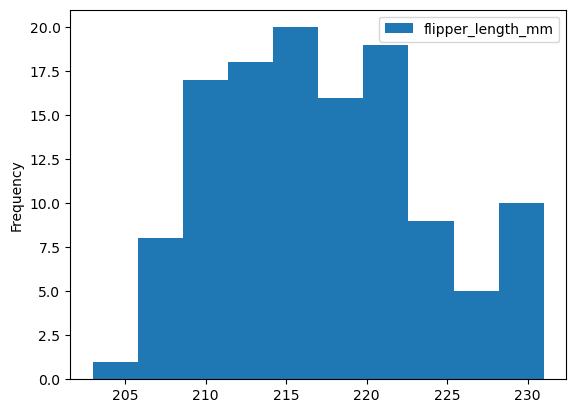

In [44]:
# distribution of flipper length measurements
# first select data, then plot

#select species gentoo and column
gentoo = penguins.loc[penguins.species == 'Gentoo', ['flipper_length_mm']]

gentoo.plot(kind='hist')
                               